<h1 align="center">AtliQo Bank Credit Card Launch</h1>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h1 style="color:purple" align="center">Data Import<h1>

### Option 1. Read data from CSV

In [6]:
df_cust = pd.read_csv('customers.csv')
df_cs = pd.read_csv('credit_profiles.csv')
df_trans = pd.read_csv('transactions.csv')

### Option 2. Read it from MySQL

In [7]:
import mysql.connector

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='Ayush@5387',
    database='e_master_card'
)

df_cust = pd.read_sql("SELECT * FROM customers", conn)
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married


In [8]:
df_trans = pd.read_sql("SELECT * FROM transactions", conn)
df_trans.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


In [9]:
df_cs = pd.read_sql("SELECT * FROM credit_profiles", conn)
df_cs.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0


In [10]:
conn.close()

In [11]:
print("Customers data",df_cust.shape)
print("Credit Score data",df_cs.shape)
print("Transactions data",df_trans.shape)

Customers data (1000, 8)
Credit Score data (1004, 6)
Transactions data (500000, 7)


In [12]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [13]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [14]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


<h1 style="color:purple" align="center">Explore Customers Table<h1>

In [15]:
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married


In [16]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


<h2 style="color:Blue">1. Analyze Income Column<h2>

### Handle Null Values: Annual income



In [17]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [18]:
df_cust[df_cust.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [19]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [20]:
occupation_wise_inc_median['Artist']

np.float64(44915.0)

In [21]:
# 2. Replace null values in annual_income with the median income of their occupation group
df_cust['annual_income'] = df_cust.apply(
    lambda row: occupation_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
)

In [22]:
df_cust.iloc[[1,29]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
29,30,Aditya Kulkarni,Male,31,Rural,Data Scientist,105583,Married


In [23]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

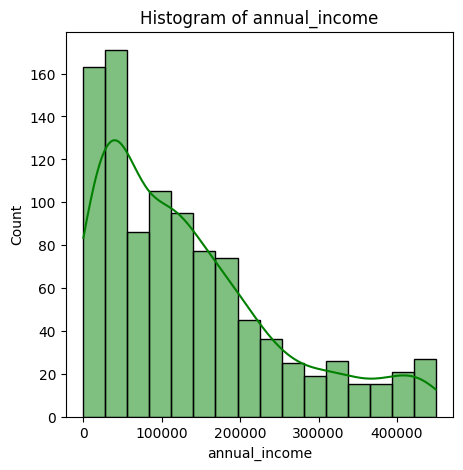

In [24]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [25]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


We have following observations from the above,

1. **Age**: min = 1, max = 135
1. **Annual Income**: min = 2, max = 447 k

Age column has outliers. Annual income also seem to have outliers in terms of minimum value because business suggested that minimum income should be atleast 100

In [26]:
df_cust.annual_income.describe()

count      1000.000000
mean     132439.799000
std      113706.313793
min           0.000000
25%       42229.750000
50%      107275.000000
75%      189687.500000
max      449346.000000
Name: annual_income, dtype: float64

### Outlier Detection: Annual income

Let us use standard deviation to detect outliers. Common practice is to treat anything that +/- 3 std dev as an outlier


In [27]:
df_cust['annual_income'].mean(), df_cust['annual_income'].std()

(np.float64(132439.799), np.float64(113706.31379289791))

In [28]:
lower = df_cust['annual_income'].mean() - 3*df_cust['annual_income'].std()
upper = df_cust['annual_income'].mean() + 3*df_cust['annual_income'].std()

lower, upper

(np.float64(-208679.14237869374), np.float64(473558.74037869374))

In [29]:
df_cust[df_cust['annual_income']>upper]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


We are seeing two outliers as per our statistical criteria of +/3 3 std deb. But we don't always assume these as outliers all the time. We have to use business knowledge and our sense of judgement. Here after discussing with the business we concluded that having this type of higher income for business owners is usual and we will keep these data points as is to stay close to the reality while doing our analysis.

On the lower end however, we see minimum income as 2. Our business manager has told us that the income should be at least 100. We can use this as our criteria to find out the outliers on the lower end. These outliers could have occured due to a data error.

In [30]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
31,32,Veer Mistry,Male,50,City,Business Owner,50,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married


### Outlier Treatment: Annual income




In [31]:
occupation_wise_inc_median["Artist"]

np.float64(44915.0)

In [32]:
for index, row in df_cust.iterrows():
    if row["annual_income"] < 100:
        occupation = df_cust.at[index, "occupation"]
        df_cust.at[index, "annual_income"] = occupation_wise_inc_median[occupation]

In [33]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [34]:
df_cust.loc[[112,256]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
112,113,Yash Sethi,Male,55,City,Business Owner,303207.0,Married
256,257,Rohan Sethi,Male,28,City,Freelancer,205791.0,Married


### Data Visualization: Annual Income



In [35]:
avg_income_per_occupation  = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation 

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

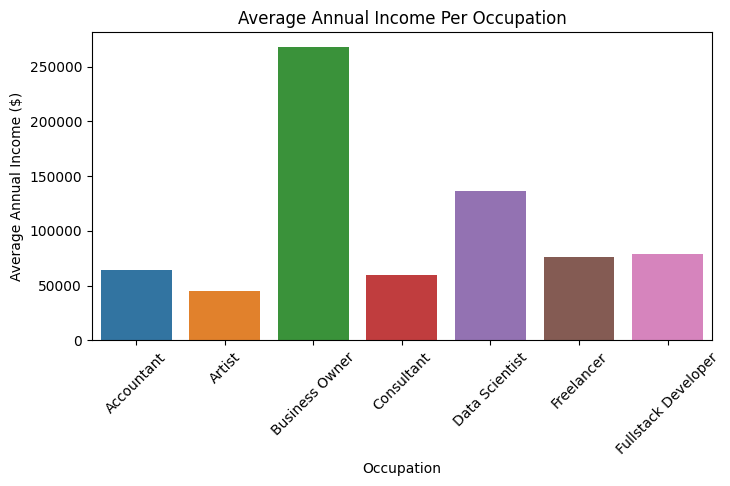

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values, palette='tab10')
plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

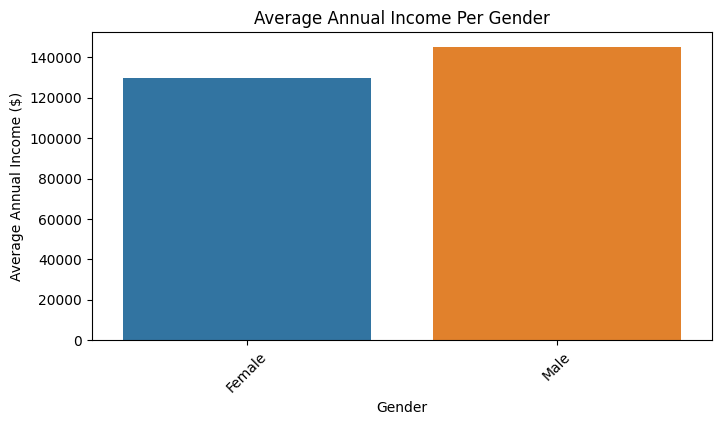

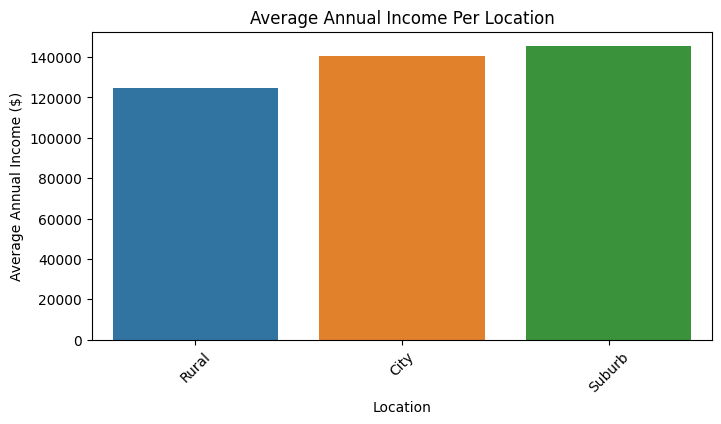

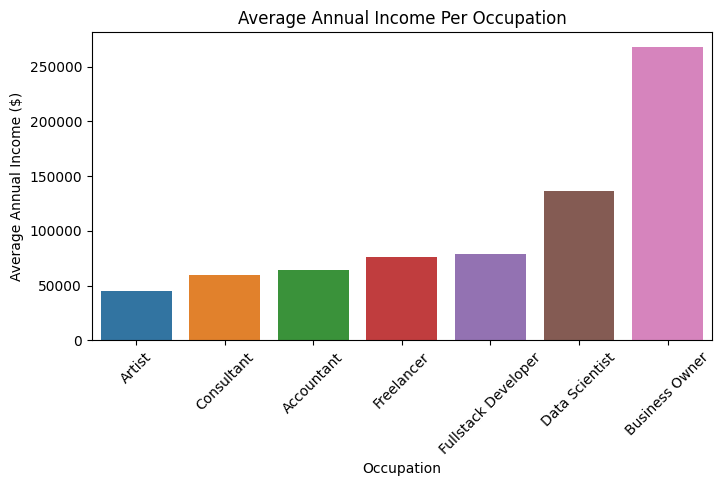

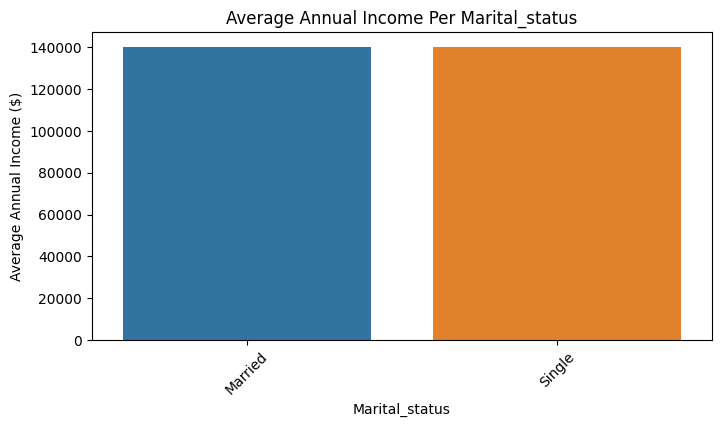

In [37]:
# List of categorical columns
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Loop through each categorical column and plot a bar chart of average annual income
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Annual Income ($)')
    plt.show()

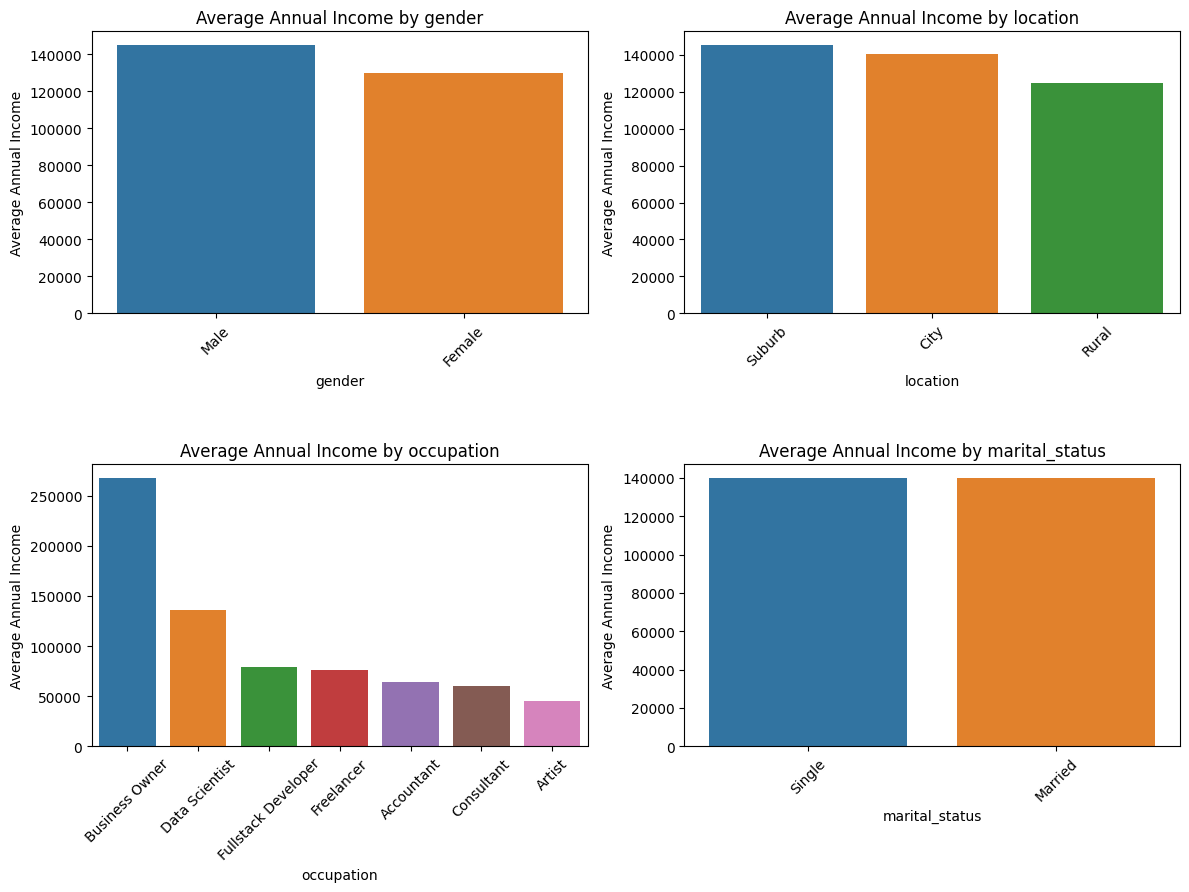

In [38]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

<h2 style="color:Blue">2. Analyze Age Column<h2>

### Handle Null Values: Age Column



In [39]:
df_cust.age.isnull().sum()

np.int64(0)

No null values are found in age column. This means we don't need to worry about handling them.

In [40]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140137.395500
std,288.819436,15.666155,110450.464107
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


### Outlier Treatment: Age

Above we see that min age is 1 and max age is 135. These seem to be outliers. So let's find out age distribution.

In [41]:
min_age = df_cust.age.min()
max_age = df_cust.age.max()

min_age, max_age

(np.int64(1), np.int64(135))

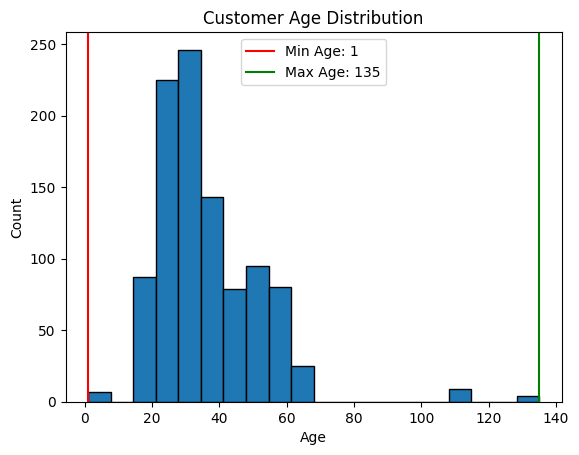

In [42]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

From above we will try to find out all customers above 80 and below 15.

In [43]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [44]:
outliers = df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers.shape

(20, 8)

Total 20 outliers for age. 

In [45]:
df_cust.age.median()

np.float64(32.0)

In [46]:
outliers.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single


**We will calculte median per occupation and then use that for replacing outliers**

In [47]:
median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [48]:
for index, row in outliers.iterrows():
    if pd.notnull(row['age']):
        occupation = df_cust.at[index, 'occupation']
        df_cust.at[index, 'age'] = median_age_per_occupation[occupation]

In [49]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [50]:
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

As you can see above, now we don't have any outliers left. min age is 18 and max is 64

In [51]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


### Data Visualization: Age Column

In [52]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

0      49-65
1      26-48
2      18-25
3      18-25
4      26-48
       ...  
995    26-48
996    49-65
997    26-48
998    26-48
999    26-48
Name: age, Length: 1000, dtype: category
Categories (3, object): ['18-25' < '26-48' < '49-65']

In [53]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [54]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [55]:
df_cust['age_group'].value_counts(normalize=True)*100

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

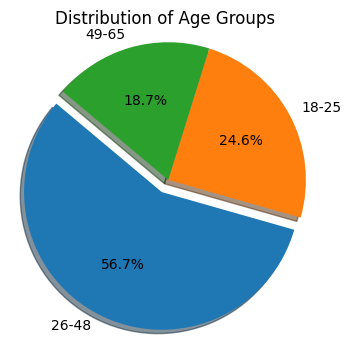

In [56]:
# Calculate the count of values in each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

##### More than 50% of customer base are in in age group of 26 - 48 adn ~26% are of age group 18 - 25

<h2 style="color:Blue">3. Analyze Gender and Location Distribution<h2>

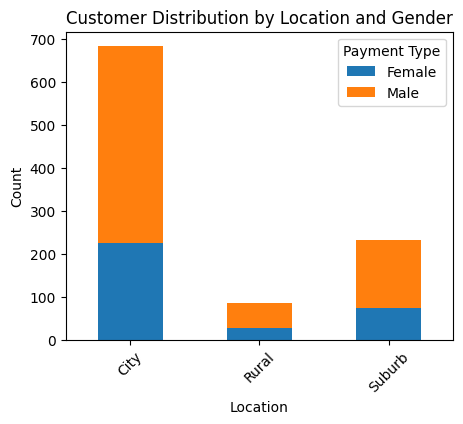

In [57]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of payment types for each occupation
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Payment Type', bbox_to_anchor=(1, 1))  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

<h1 style="color:purple" align="center">Explore Credit Score Table<h1>

In [58]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


### Data Cleaning Step 1: Remove Duplicates 

In [59]:
df_cs.shape

(1004, 6)

In [60]:
df_cs['cust_id'].nunique()

1000

In [61]:
df_cs.duplicated('cust_id')

0       False
1       False
2       False
3       False
4       False
        ...  
999     False
1000    False
1001    False
1002    False
1003    False
Length: 1004, dtype: bool

In [62]:
df_cs[df_cs.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [63]:
df_cs_clean_1 = df_cs.drop_duplicates(subset='cust_id', keep="last")
df_cs_clean_1.shape

(1000, 6)

In [64]:
df_cs_clean_1[df_cs_clean_1.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


### Data Cleaning Step 2: Handle Null Values

In [65]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [66]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [67]:
df_cs_clean_1['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

In [68]:
df_cs_clean_1['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

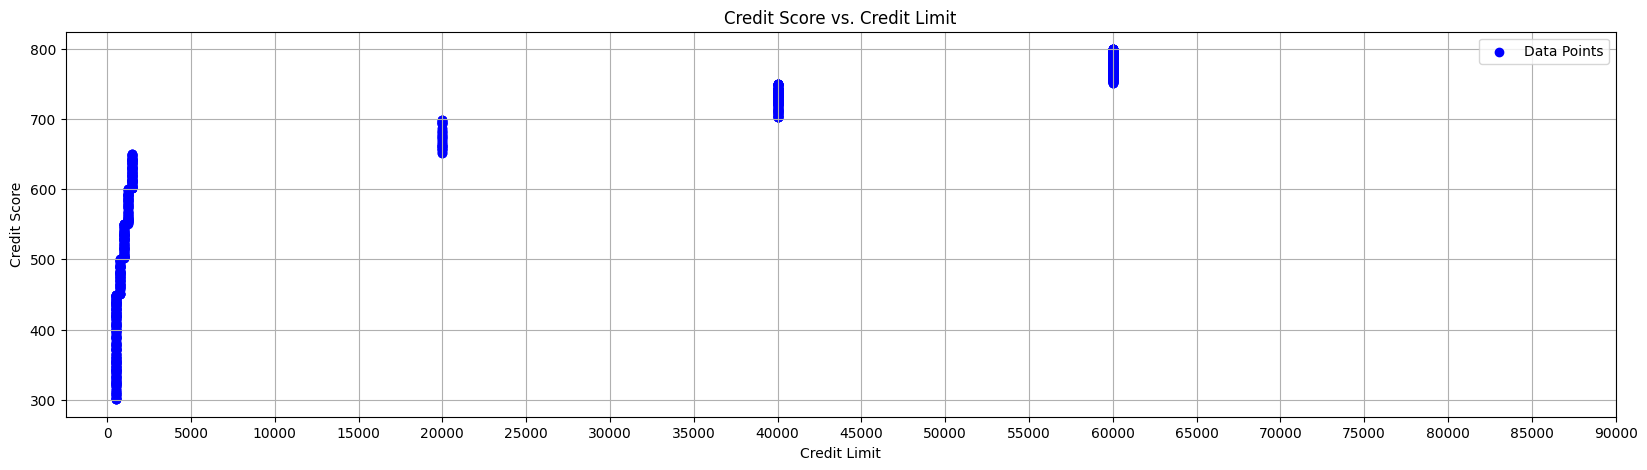

In [69]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)
# Create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_clean_1['credit_limit'], df_cs_clean_1['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

Here we can see clear relationship between credit score and credit limit. Where there are levels for example, upto 650 score is getting a very minor credit limit (<1000$) where as a score between 650 to 700 is getting around 20000. Score between 700 to 750 is getting around 40K etc.

In [70]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [71]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


We can now see a new column called credit_score_range whcih is calculated based on the credit_score column

In [72]:
df_cs_clean_1[['credit_score','credit_score_range', 'credit_limit']].head(3)

,credit_score,credit_score_range,credit_limit
0,749,700-749,40000.0
1,587,550-599,1250.0
2,544,500-549,1000.0


In [73]:
df_cs_clean_1[df_cs_clean_1['credit_score_range']=="750-799"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
21,22,785,0.897089,36083.0,3.0,60000.0,750-799
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
26,27,766,0.830908,31344.0,3.0,60000.0,750-799
29,30,798,0.222597,7238.0,2.0,60000.0,750-799
31,32,768,0.747793,35109.0,2.0,60000.0,750-799
...,...,...,...,...,...,...,...
988,985,770,0.628088,33405.0,2.0,60000.0,750-799
993,990,772,0.259958,11937.0,2.0,60000.0,750-799
996,993,782,0.477170,20305.0,2.0,60000.0,750-799
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799


In [74]:
df_cs_clean_1[df_cs_clean_1['credit_score_range']=="300-449"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449
...,...,...,...,...,...,...,...
981,978,371,0.435307,183.0,2.0,500.0,300-449
982,979,332,0.150815,65.0,1.0,500.0,300-449
984,981,327,0.377202,108.0,3.0,500.0,300-449
989,986,425,0.178470,56.0,4.0,500.0,300-449


In [75]:
mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [76]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
562,562,507,0.592631,409.0,4.0,NaN,500-549
845,842,490,0.555309,249.0,1.0,NaN,450-499
126,127,522,0.287678,204.0,4.0,NaN,500-549


In [77]:
# Merge the mode values back with the original DataFrame
df_cs_clean_2 = pd.merge(df_cs_clean_1, mode_df, on='credit_score_range', suffixes=('', '_mode'))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
831,832,416,0.530581,202.0,4.0,500.0,300-449,500.0
79,80,790,0.355074,13210.0,4.0,60000.0,750-799,60000.0
269,270,496,0.813520,363.0,0.0,750.0,450-499,750.0


In [78]:
df_cs_clean_2[df_cs_clean_2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
561,562,507,0.592631,409.0,4.0,NaN,500-549,1000.0
820,821,426,0.578425,177.0,3.0,NaN,300-449,500.0
276,277,781,0.459545,24618.0,1.0,NaN,750-799,60000.0


Above we can simple replace NaN value in credit_limit column with credit_limit_mode value. This value indicates most frequently occuring credit limit for a given credit_score_range. Hence it can be used as a replacement value.



In [79]:
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace=True)
df_cs_clean_3.shape

(1000, 8)

In [80]:
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

You can now see ZERO outliers in credit_limit column which means we successfully got rid of all NULL values

In [81]:
df_cs_clean_3[df_cs_clean_3.cust_id==117]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
116,117,372,0.604427,252.0,4.0,500.0,300-449,500.0


Previously customer id 5 had null value in credit_limit. Now it has a valid value

### Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [82]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


**Visualizing outliers**

Text(0.5, 1.0, 'Box plot for outstanding debt')

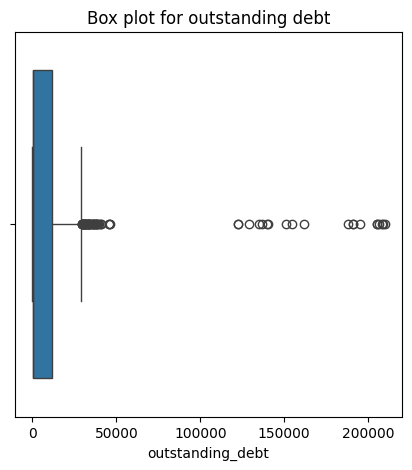

In [83]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df_cs_clean_3['outstanding_debt'])
plt.title('Box plot for outstanding debt')

Instead of using any statistical approach (such as standard deviation or IQR), here too we will use a business knowledge. We will mark any outstanding debt that is greater than credit limit as an outlier

In [84]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


We will replace these outliers with credit_limit. We can assume that there was some data processing error due to we got these high numbers and it is ok to replace them with a credit_limit

In [85]:
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [86]:
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [87]:
df_cs_clean_3.loc[[55,66]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
55,56,429,0.198374,74.0,3.0,500.0,300-449,500.0
66,67,429,0.229638,69.0,4.0,500.0,300-449,500.0


In [88]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [89]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000,60000.000000


### Data Exploration: Visualizing Correlation in Credit Score Table

In [90]:
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48


In [91]:
df_cs_clean_3.head(2)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0


In [92]:
df_merged = df_cust.merge(df_cs_clean_3, on='cust_id', how='inner')
df_merged.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0


In [93]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575685,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086816,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555077,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684627,0.510993
annual_income,0.575685,-0.086816,0.555077,0.684627,1.000000,0.618136
age,0.444917,-0.027713,0.444301,0.510993,0.618136,1.000000


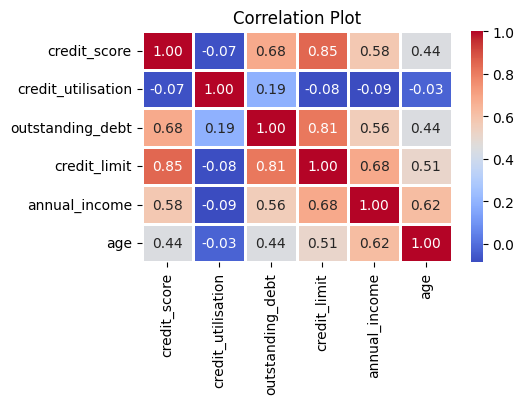

In [94]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()

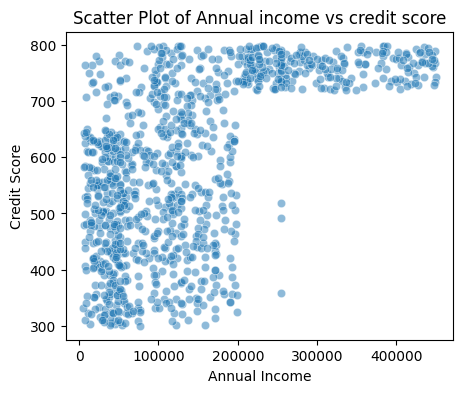

In [95]:
# Just looking if there is any relation between annual_income and credit score
plt.figure(figsize=(5, 4))
sns.scatterplot(x='annual_income', y='credit_score', data=df_merged, alpha=0.5)
plt.title('Scatter Plot of Annual income vs credit score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

##### No clear pattern observed

<h1 style="color:purple" align="center">Transactions Table<h1>

In [96]:
df_trans.head(2)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card


In [97]:
df_trans.shape

(500000, 7)

### Data Cleaning Step 1: Handle NULL Values: platform column

In [98]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

platform has a lot of null values. Let's check them further

In [99]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


<Axes: xlabel='count', ylabel='product_category'>

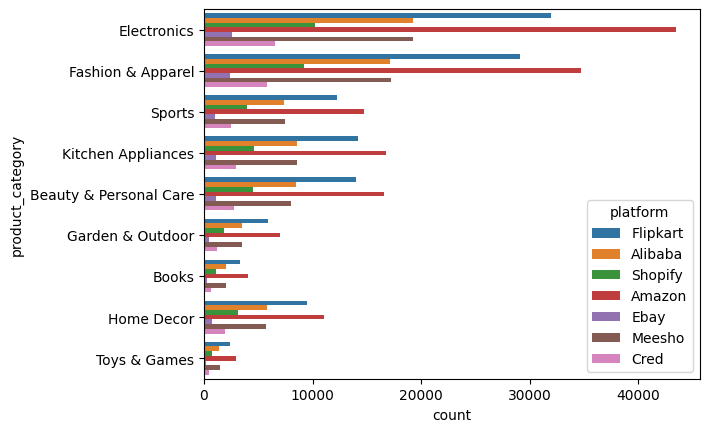

In [100]:
sns.countplot(y='product_category', hue='platform', data=df_trans)

In [101]:
df_trans.platform.mode()

0    Amazon
Name: platform, dtype: object

In [102]:
df_trans.platform.mode()[0]

'Amazon'

In [103]:
df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)

In [104]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

### Data Cleaning Step 2: Treat Outliers: tran_amount

In [105]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We can see transactions with 0 amount. These seem to be invalid

In [106]:
df_trans_zero = df_trans[df_trans.tran_amount==0]
df_trans_zero.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card


In [107]:
df_trans_zero.shape

(4734, 7)

In [108]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [109]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [110]:
df_trans_1 = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_1.shape

(15637, 7)

In [111]:
df_trans_1[df_trans_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [112]:
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

np.float64(554.0)

In [113]:
df_trans['tran_amount'].replace(0,median_to_replace, inplace=True)

In [114]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


As you can see above, no zero values are left in tran_amount column

In [115]:
df_trans.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [116]:
df_trans[df_trans['tran_amount']<1000].describe()

,tran_id,cust_id,tran_amount
count,475000.000000,475000.000000,475000.000000
mean,250041.699922,501.375499,240.667608
std,144285.259913,288.606185,244.487110
min,1.000000,1.000000,2.000000
25%,125126.750000,252.000000,63.000000
50%,250100.500000,502.000000,131.000000
75%,374928.250000,751.000000,348.000000
max,500000.000000,1000.000000,999.000000


In [117]:
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [118]:
df_trans[df_trans.tran_amount<upper].tran_amount.max()

np.int64(999)

In [119]:
df_trans[df_trans.tran_amount>upper].tran_amount.min()

np.int64(50000)

In [120]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [121]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [122]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [123]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [124]:
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [125]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


You can now see that we got rid of outliers from tran_amount column. Great job folks 👍🏼🔥🔥

<Axes: xlabel='tran_amount', ylabel='Count'>

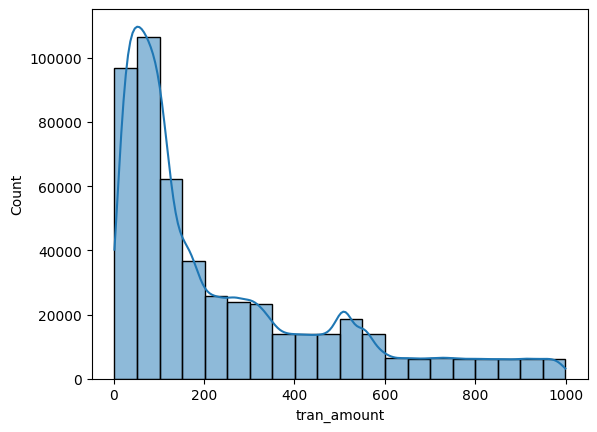

In [126]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

Above shows the histogram of transactions after the removal of outliers. You can see that distribution is right skewed. Transaction amount now is less than 1000

### Data Visualization: Payment Type Distribution

In [127]:
df_trans.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe


<Axes: xlabel='payment_type', ylabel='percent'>

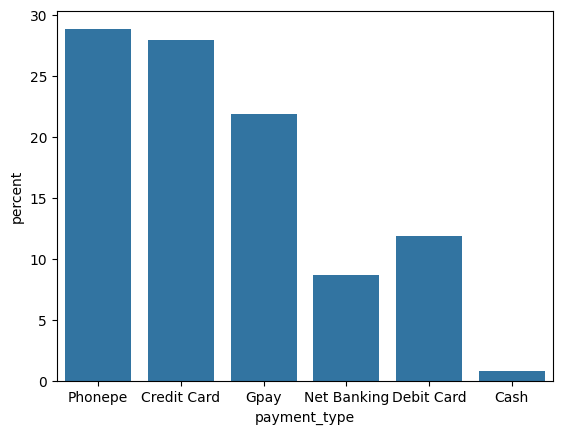

In [128]:
sns.countplot(x=df_trans.payment_type, stat='percent')

**Distribution of payment types across age groups**

In [129]:
df_merged_2 = df_merged.merge(df_trans, on='cust_id', how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [130]:
df_merged_2.shape

(500000, 22)

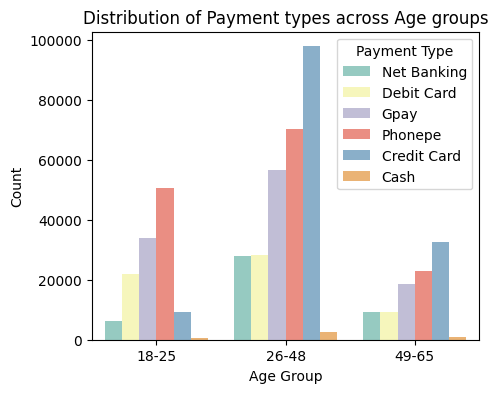

In [131]:
plt.figure(figsize=(5, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

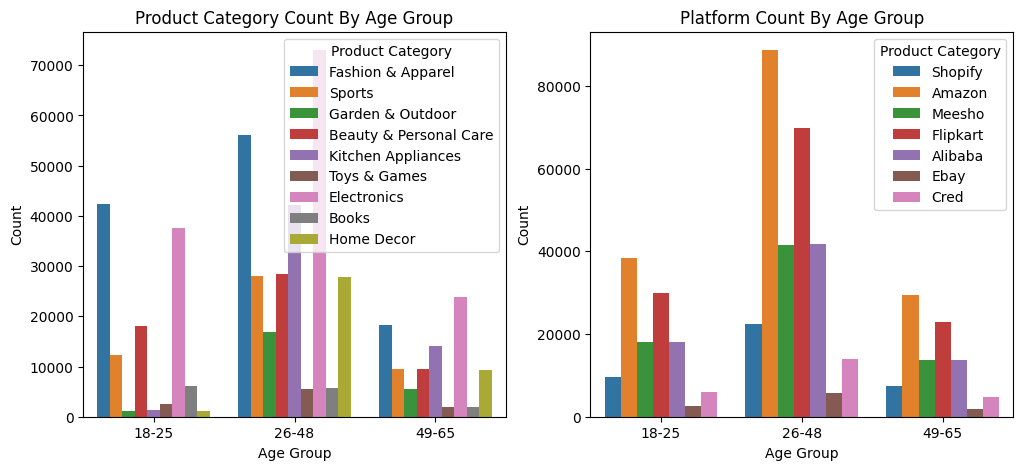

In [132]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Data Visualization: Average Transaction Amount

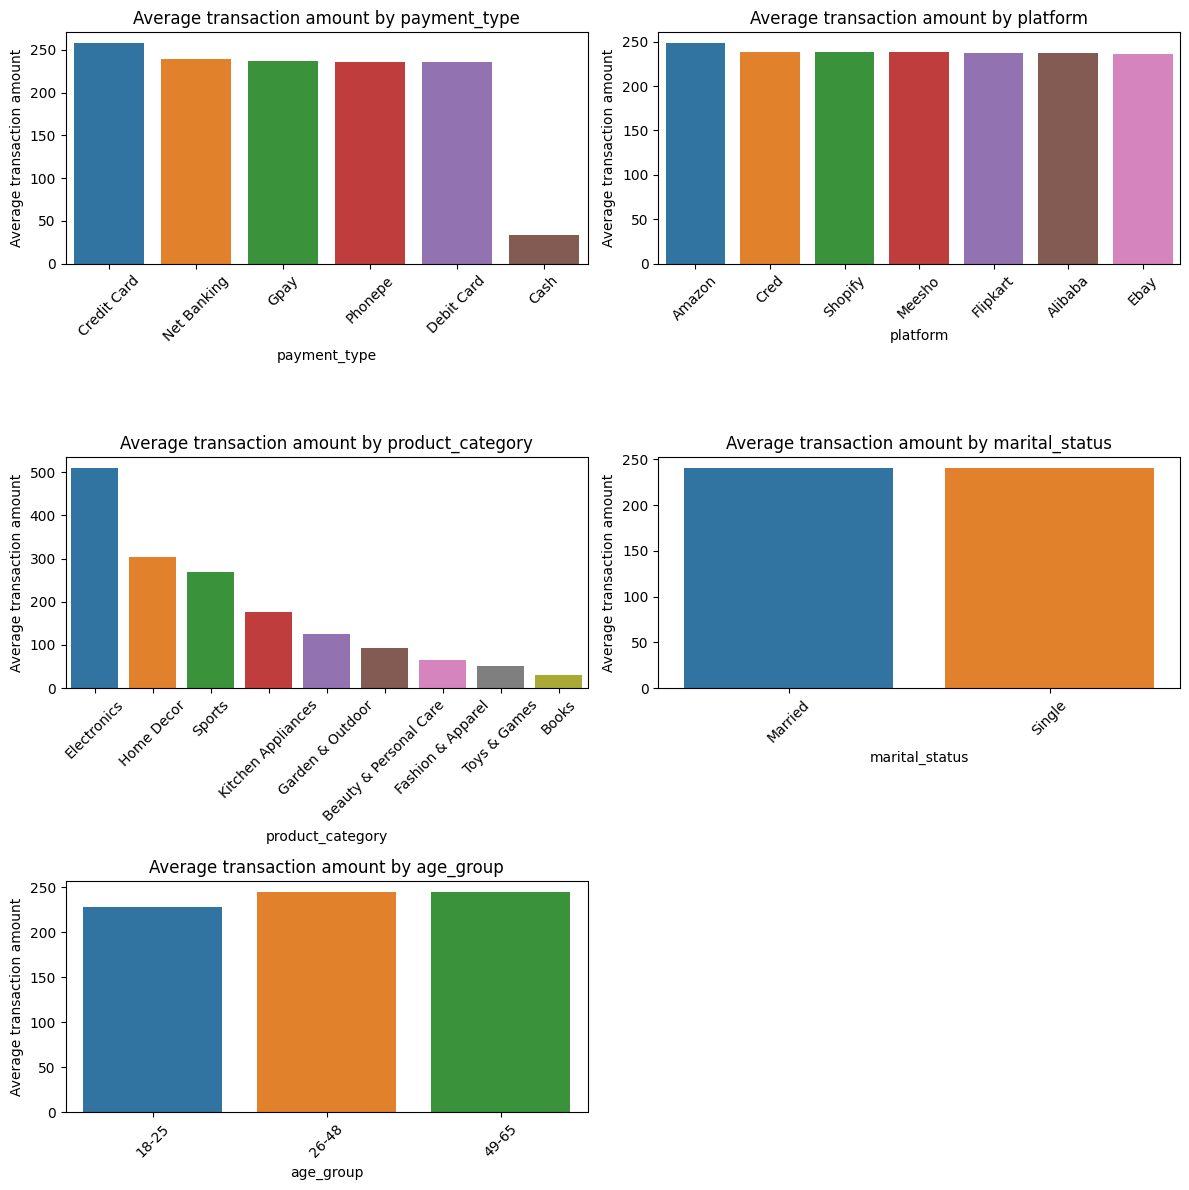

In [133]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [134]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711635,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [135]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,36969.670732,1130.081301,484.451220
1,26-48,145437.104938,20560.846561,597.569665
2,49-65,259786.192513,41699.197861,701.524064


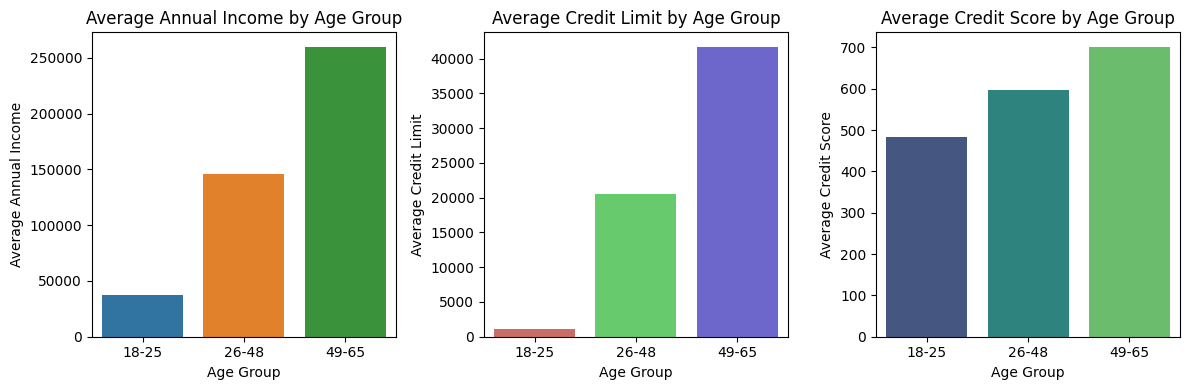

In [136]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

#### Targeting Untapped market

![image-2.png](image-2.png)

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care